In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from simtk import unit

# Double Well Potential

Our double well potential, in a single dimension, is described by the following expression:

\begin{equation}
f(x)=E_{0}*\left[ \left(\frac{x}{c}\right)^4 -2\left(\frac{x}{c}\right)^2 \right]-\frac{m}{c}x
\end{equation}

In [3]:
def double_well(x,Eo,c,m):
    return Eo*((x/c)**4-2*(x/c)**2)-(m/c)*x

Lets see the meaning of the constants: $E_{0}$, $m$ y $c$.

## Symmetric case ($m=0$)

A symmetric double well potential can be represented by the former mathematical expression when $m=0$. In this situation, the double well minima are placed in $x=-c$ and $x=c$. And $E_{0}$ is the value of the barrier height (equal for both basins). Lets verify these statements with an example:

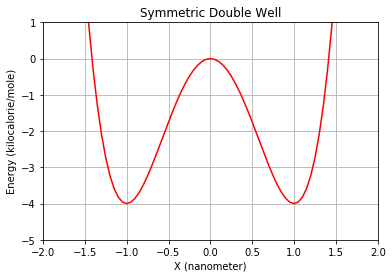

In [4]:
Eo=4.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
c=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
m=0.0 * unit.kilocalories_per_mole # No need to explanation at this moment

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Symmetric Double Well")
plt.show()

You can play with the last cell, changing the $E_{0}$ and $c$ values, to check the consistency of their description. Or you can instead work with the first derivative of the potential to do the same analytically:

In [5]:
x, Eo, c = sy.symbols('x Eo c')
f = Eo*((x/c)**4-2*(x/c)**2)

g=sy.diff(f,x) # Primera derivada con respecto a x de la funcion f

In [6]:
g

Eo*(-4*x/c**2 + 4*x**3/c**4)

The first derivative can be factorized to unveil the value of its three roots: $x=0$, the barrier position, and $x=c$ y $x=-c$, the minima positions.

In [7]:
sy.factor(g)

4*Eo*x*(-c + x)*(c + x)/c**4

The height of the barrier, from the bottom of the basins to its top, can then be calculated:

\begin{equation}
f(0)-f(c)=0-E_{0}*\left[ 1-2 \right]=E_{0}
\end{equation}

### Frequency of small oscillations around the minima

Now that the role of $E_{0}$ and $c$ is clear for the symmetric double well, we are interested in the frequency of the small oscillations at the energy minima. This frequency will be our time of reference to choose an appropriate integration time step of at the time of simulate the dynamics of a particle in this potential. This can be done attending to the second derivative of the potential.

The value of any mathematical function close enough to a minimum can be approximated by the value of the function at the minimum plus the resulting contribution of an harmonic potential. The stiffness of this harmonic potential is equal the to value of the second derivative of the function at the minimum. This is what is known as the Taylor expansion of any function (truncated in the third grade):

\begin{equation}
f(x) \approx f(x_{0}) + f'(x_{0})(x-x_{0}) + \frac{1}{2} f''(x_{0})(x-x_{0})^{2}
\end{equation}

And by definition of minimum:

\begin{equation}
f'(x_{0})=0
\end{equation}

So:

\begin{equation}
f(x) \approx f(x_{0}) + \frac{1}{2} f''(x_{0})(x-x_{0})^{2}
\end{equation}

At this point lets make a break to talk about the harmonic potential. We all know the hooks law to describe the force  suffered by a mass attached to an ideal spring around the equilibrium position:

\begin{equation}
F(x) = -k(x-x_{0})
\end{equation}

Where $k$ is the stiffness of the spring and $x_{0}$ is the equilibrium position. The potential energy $V(x)$ is now deduced given that:

\begin{equation}
F(x) = -\frac{d V(x)}{dx}
\end{equation}

So, the spring force is the result of the first harmonic potential derivative:

\begin{equation}
V(x) = \frac{1}{2} k (x-x_{0})^{2}
\end{equation}

And the frequency of oscillation of the spring, or a particle goberned by the former potential, is:

\begin{equation}
\omega = \sqrt{\frac{k}{m}}
\end{equation}

Where $m$ is the mass of the particle. This way the potential can also be written as:

\begin{equation}
V(x) = \frac{1}{2} k (x-x_{0})^{2} = \frac{1}{2} m \omega^{2} (x-x_{0})^{2}
\end{equation}

Now, going back to our Taylor expansion of any mathematical function $f(x)$. If the shape of the $f(x)$ around a minimum $x_{0}$ can be approximated with an harmonic potential, this means that the characteristic frequency $\omega$ of the oscillations around the near surroundings of the minimum is -by comparison with the potential behind the hook's law-:

\begin{equation}
\omega = \sqrt{\frac{f''(x_{0})}{m}}
\end{equation}

This way the frequency of the small oscillations of a particle with mass $m$ around a minimum can then by obtained from the value of the second derivative at the minimum:

In [8]:
x, Eo, c = sy.symbols('x Eo c')
f = Eo*((x/c)**4-2*(x/c)**2)

gg=sy.diff(f,x,x) # Primera derivada con respecto a x de la funcion f

gg

-4*Eo*(1 - 3*x**2/c**2)/c**2

Let's look at the minimum at $x=c$:

In [9]:
gg.subs({x:c})

8*Eo/c**2

In this case the frequency of the oscillations of a particle with mass $m$ is:

\begin{equation}
\omega = \sqrt{\frac{8E_{0}}{mc^{2}}}
\end{equation}

And the period is:

\begin{equation}
T = \frac{2\pi}{\omega} = 2\pi \sqrt{\frac{mc^{2}}{8E_{0}}}
\end{equation}

We can see graphically how the Taylor expansion is a good aproximation when close enough to a minimum:

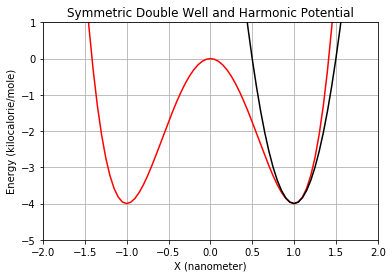

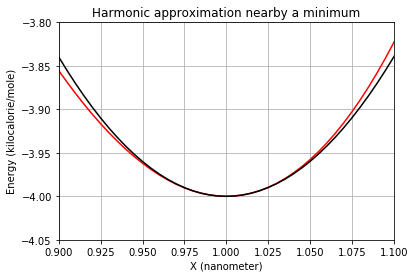

In [10]:
def harmonic_well(x,k,c,Eo):
    return 0.5*k*(x-c)**2-Eo

Eo=4.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
c=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
m=0.0 * unit.kilocalories_per_mole # No need to explanation at this moment
k=(8*Eo)/c**2 # harmonic stiffness

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.plot(x_serie, harmonic_well(x_serie,k,c,Eo), 'k-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Symmetric Double Well and Harmonic Potential")
plt.show()

x_serie = np.arange(-0.5, 1.5, 0.005) * unit.nanometers

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.plot(x_serie, harmonic_well(x_serie,k,c,Eo), 'k-')
plt.ylim(-4.05,-3.8)
plt.xlim(0.9,1.1)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Harmonic approximation nearby a minimum")
plt.show()

## Assymetric case ($m\neq0$)

In the case of $m\neq 0$, our double well turns in to an assymetric potential. In this situation $E_{0}$ and $c$ have **approximately** the same interpretation, and $m$ can be **approximately** understood as the amount energy that basins shift up or down, depending on the relative position to $x=0$. In our double well, the left basin raises and the right basin drops when $m>0$. Lets see this in a plot:

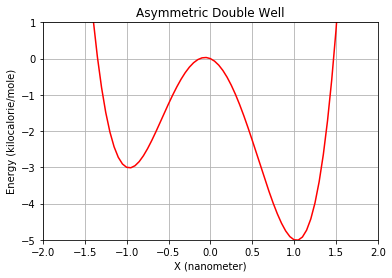

In [11]:
Eo=4.0 * unit.kilocalories_per_mole # barrier height when the double well is symmetric.
c=1.0 * unit.nanometers # Absolute value of the coordinates of minima (the potential is an even function).
m=1.0 * unit.kilocalories_per_mole # vertical shift of basins (approx.)

x_serie = np.arange(-5., 5., 0.05) * unit.nanometers

plt.plot(x_serie, double_well(x_serie,Eo,c,m), 'r-')
plt.ylim(-5,1)
plt.xlim(-2,2)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.title("Asymmetric Double Well")
plt.show()

The value of the energy barrier from the left minimum is $\approx E_{0}+m$, while $\approx E_{0}-m$ accounts for the barrier from the right minimum.

### Frequency of small oscillations around the minima.

Given that $m$ is included as a linear factor in the potential, its effect vanishes in the second derivative. Thereby, the harmonic approximation described for the symmetric double well is exact also for this case. Thus, the frequency and period values for small oscillations around a minimum obtained when $m=0$ can be considered as a good **approximation** for $m\neq 0$. Notice that the positions of the minima, and the position of the barrier, are slightly shifted with respect to those for the symmetric double well. 

## Working with this test system

The system made by $N$ particles in this double well potential is predefined to be used with OpenMM in this library a python class:

In [12]:
from uibcdf_test_systems import DoubleWell

double_well = DoubleWell(n_particles = 1, mass = 64 * unit.amu, Eo=4.0 * unit.kilocalories_per_mole,
                         c=1.0 * unit.nanometers, m=1.0 * unit.kilocalories_per_mole)

The potential expression is stored in the attribute `potential`:

In [13]:
double_well.potential

Eo*(-2.0*x**2/c**2 + x**4/c**4) + 4.0*Eo*(y**2 + z**2)/c**2 - m*x/c

And the system to be used with OpenMM is accesible as:

In [14]:
double_well.system

<simtk.openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x7f112fed27e0> >

### Newtonian dynamics

Thanks to the `simulation.newtonian` method in this library, a simple newtonian dynamics can be run with few efforce:

In [19]:
from uibcdf_test_systems import DoubleWell
from uibcdf_test_systems.simulation import newtonian

double_well = DoubleWell(n_particles = 1, mass = 64 * unit.amu, Eo=4.0 * unit.kilocalories_per_mole,
                         c=1.0 * unit.nanometers, m=1.0 * unit.kilocalories_per_mole)

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_positions[0,0] = 1.1 * unit.nanometers

initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds

time, position, velocity, kinetic_energy, potential_energy = newtonian (double_well.system,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 100 * unit.picoseconds)

We can now plot the trajectory of the x coordinate:

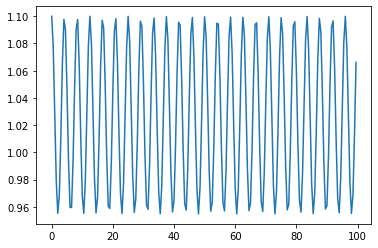

In [21]:
plt.plot(time, position[:,0,0])

Check that the period of the oscillations is in agreement with the valuee calculated before. Check also that the period do not depend on the amplitude it oscillations are small enough.

The newtonian dynamics can include damping. This way we can simulate damped oscillations around the minimum.

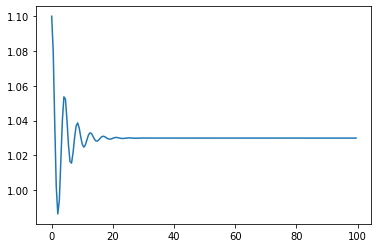

In [29]:
time, position, velocity, kinetic_energy, potential_energy = newtonian (double_well.system,
                                                                        friction = 0.5 / unit.picoseconds,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 100 * unit.picoseconds)

plt.plot(time, position[:,0,0])
plt.show()

What would be the friction value needed to enter in the overdamped regime?

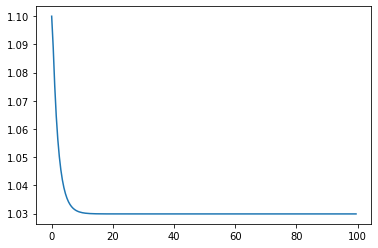

In [28]:
time, position, velocity, kinetic_energy, potential_energy = newtonian (double_well.system,
                                                                        friction = 5.0 / unit.picoseconds,
                                                                        initial_positions = initial_positions,
                                                                        initial_velocities = initial_velocities,
                                                                        integration_timestep = 0.02 * unit.picoseconds,
                                                                        saving_timestep = 0.5 * unit.picoseconds,
                                                                        total_time = 100 * unit.picoseconds)

plt.plot(time, position[:,0,0])
plt.show()

In [20]:
### Langevin NVT run

Thanks to the `simulation.langevin_NVT` method in this library, a simple newtonian dynamics can be run with few efforce:

Thanks to the `simulation.langevin_NVT` method in this library, a simple Langevin dynamics can be run with few efforce:

In [ ]:
from uibcdf_test_systems import DoubleWell
from uibcdf_test_systems.simulation import langevin_NVT

double_well = DoubleWell(n_particles = 1, mass = 64 * unit.amu, Eo=4.0 * unit.kilocalories_per_mole,
                         c=1.0 * unit.nanometers, m=1.0 * unit.kilocalories_per_mole)

initial_positions =  np.zeros([1, 3], np.float32) * unit.nanometers
initial_positions[0,0] = 1.0 * unit.nanometers

initial_velocities = np.zeros([1, 3], np.float32) * unit.nanometers/unit.picoseconds

time, position, velocity, kinetic_energy, potential_energy = langevin_NVT (double_well.system,
                                                                           temperature = 300 * unit.kelvin,
                                                                           friction = 1.0 / unit.picoseconds,
                                                                           initial_positions = initial_positions,
                                                                           initial_velocities = initial_velocities,
                                                                           integration_timestep = 0.02 * unit.picoseconds,
                                                                           saving_timestep = 0.5 * unit.picoseconds,
                                                                           total_time = 100 * unit.picoseconds)

Let us see the time evolution of the coordinate $x$ of our single particle:

In [ ]:
plt.plot(time, position[:,0,0])

The system is fluctuating around the minimum $x_{0}=1$. We need a longer trajectory to observe a jump out the initial visited well.